## Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Data Preprocessing

In [2]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
!nvidia-smi

Sat Apr 19 22:31:44 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 561.19                 Driver Version: 561.19         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   44C    P3             12W /   30W |       0MiB /   6144MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### Training Image Preprocessing

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 1616 files belonging to 11 classes.


### Validation Image Preprocessing

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 1051 files belonging to 11 classes.


In [6]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 11), dtype=tf.float32, name=None))>

In [7]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[5.0000000e-01 5.0000000e-01 5.0000000e-01]
   [5.0000000e-01 5.0000000e-01 5.0000000e-01]
   [2.5000000e-01 2.5000000e-01 2.5000000e-01]
   ...
   [0.0000000e+00 0.0000000e+00 0.0000000e+00]
   [5.0000000e-01 5.0000000e-01 5.0000000e-01]
   [2.5000000e-01 2.5000000e-01 2.5000000e-01]]

  [[5.0000000e-01 5.0000000e-01 5.0000000e-01]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00]
   [7.5000000e-01 7.5000000e-01 7.5000000e-01]
   ...
   [5.0000000e-01 5.0000000e-01 5.0000000e-01]
   [2.5000000e-01 2.5000000e-01 2.5000000e-01]
   [7.5000000e-01 7.5000000e-01 7.5000000e-01]]

  [[2.5000000e-01 2.5000000e-01 2.5000000e-01]
   [2.5000000e-01 2.5000000e-01 2.5000000e-01]
   [2.5000000e-01 2.5000000e-01 2.5000000e-01]
   ...
   [5.0000000e-01 5.0000000e-01 5.0000000e-01]
   [5.0000000e-01 5.0000000e-01 5.0000000e-01]
   [7.5000000e-01 7.5000000e-01 7.5000000e-01]]

  ...

  [[1.0000000e+00 1.0000000e+00 1.0000000e+00]
   [5.0000000e-01 5.0000000e-01 5.0000000e-01]
   [5.0000000e-

### To avoid Overshooting
1. Choose small learning rate default 0.001 we are taking 0.0001
2. There may be chance of Underfitting, so increase number of neuron
3. Add more Convolution layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [8]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [9]:
model = Sequential()

In [10]:
## Building Convolution Layer

In [11]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [16]:
model.add(Dropout(0.25)) # To avoid Overfitting

In [17]:
model.add(Flatten())

In [18]:
model.add(Dense(units=1500,activation='relu'))

In [19]:
model.add(Dropout(0.4))

In [20]:
#Output Layer
model.add(Dense(units=11,activation='softmax'))

### Compiling Model

In [21]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

### Model Training

In [23]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
51/51 [==============================] - 22s 179ms/step - loss: 2.1113 - accuracy: 0.2717 - val_loss: 1.6577 - val_accuracy: 0.4129
Epoch 2/10
51/51 [==============================] - 6s 118ms/step - loss: 1.4049 - accuracy: 0.5105 - val_loss: 1.1314 - val_accuracy: 0.6051
Epoch 3/10
51/51 [==============================] - 6s 118ms/step - loss: 1.0647 - accuracy: 0.6355 - val_loss: 0.7733 - val_accuracy: 0.7507
Epoch 4/10
51/51 [==============================] - 6s 118ms/step - loss: 0.8293 - accuracy: 0.7191 - val_loss: 0.5218 - val_accuracy: 0.8525
Epoch 5/10
51/51 [==============================] - 6s 117ms/step - loss: 0.5999 - accuracy: 0.8038 - val_loss: 0.3610 - val_accuracy: 0.9077
Epoch 6/10
51/51 [==============================] - 6s 117ms/step - loss: 0.4788 - accuracy: 0.8478 - val_loss: 0.3050 - val_accuracy: 0.9029
Epoch 7/10
51/51 [==============================] - 6s 116ms/step - loss: 0.3385 - accuracy: 0.8942 - val_loss: 0.2158 - val_accuracy: 0.9334
Epoch

## Model Evaluation

In [24]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

51/51 [==============================] - 2s 32ms/step - loss: 0.0543 - accuracy: 0.9839


In [25]:
print(train_loss,train_acc)

0.05426234379410744 0.9839109182357788


In [26]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

33/33 [==============================] - 1s 30ms/step - loss: 0.0764 - accuracy: 0.9762


In [27]:
print(val_loss,val_acc)

0.0764463022351265 0.9762131571769714


### Saving Model

In [28]:
model.save("trained_model.keras")

In [29]:
training_history.history

{'loss': [2.111321449279785,
  1.404931902885437,
  1.0647425651550293,
  0.8292543888092041,
  0.5998910069465637,
  0.47881051898002625,
  0.33850038051605225,
  0.25560563802719116,
  0.22779661417007446,
  0.15724077820777893],
 'accuracy': [0.27165842056274414,
  0.510519802570343,
  0.635519802570343,
  0.719059407711029,
  0.8038366436958313,
  0.8477723002433777,
  0.8941831588745117,
  0.9263613820075989,
  0.9288366436958313,
  0.9498762488365173],
 'val_loss': [1.657676100730896,
  1.1313753128051758,
  0.7733246684074402,
  0.5217736959457397,
  0.36104658246040344,
  0.3049542307853699,
  0.21575802564620972,
  0.2027219831943512,
  0.1575337052345276,
  0.07644696533679962],
 'val_accuracy': [0.41294005513191223,
  0.6051379442214966,
  0.750713586807251,
  0.8525214195251465,
  0.9077069163322449,
  0.9029495716094971,
  0.9333967566490173,
  0.9286394119262695,
  0.9467174410820007,
  0.9762131571769714]}

In [30]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [31]:
training_history.history['val_accuracy']

[0.41294005513191223,
 0.6051379442214966,
 0.750713586807251,
 0.8525214195251465,
 0.9077069163322449,
 0.9029495716094971,
 0.9333967566490173,
 0.9286394119262695,
 0.9467174410820007,
 0.9762131571769714]

### Accuracy Visualization

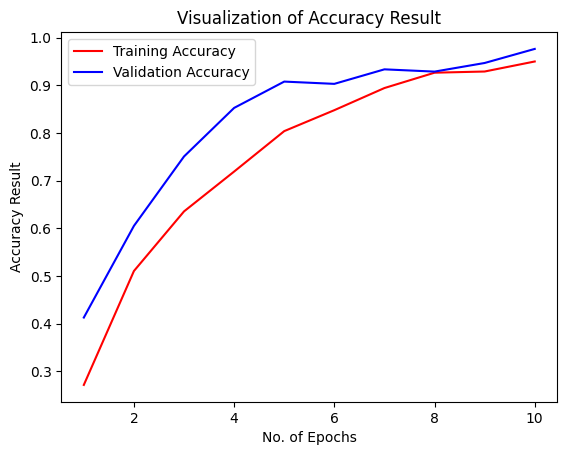

In [32]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [33]:
class_name = validation_set.class_names
class_name

['Ammobaculites',
 'Dorothia',
 'Eggerella',
 'Gaudryna',
 'Lituola',
 'Quinqueloculina',
 'Spiroloculina',
 'Triloculina',
 'Tritexia',
 'Trochamminoides',
 'Vernuilina']

In [34]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 1051 files belonging to 11 classes.


In [35]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

33/33 [==============================] - 1s 34ms/step


(array([[9.99956846e-01, 8.53158781e-06, 1.09262610e-05, ...,
         4.51085361e-06, 2.34941879e-07, 5.93638242e-06],
        [9.78847921e-01, 1.90027698e-03, 5.34424849e-04, ...,
         1.68996956e-03, 2.10270679e-04, 3.44989449e-03],
        [9.99940276e-01, 1.05459976e-05, 1.41156042e-05, ...,
         7.35919002e-06, 3.44153875e-07, 5.79848756e-06],
        ...,
        [7.67428673e-07, 1.34724473e-07, 1.13864244e-10, ...,
         3.73002162e-09, 7.19897209e-09, 9.99999046e-01],
        [1.51167953e-07, 2.76276744e-08, 9.46085831e-12, ...,
         5.95797855e-10, 1.75405224e-09, 9.99999762e-01],
        [9.83373383e-10, 5.74112147e-10, 7.59080773e-14, ...,
         2.27849042e-11, 1.90100696e-11, 1.00000000e+00]], dtype=float32),
 (1051, 11))

In [36]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [37]:
predicted_categories

<tf.Tensor: shape=(1051,), dtype=int64, numpy=array([ 0,  0,  0, ..., 10, 10, 10], dtype=int64)>

In [38]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(1051, 11), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [39]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(1051,), dtype=int64, numpy=array([ 0,  0,  0, ..., 10, 10, 10], dtype=int64)>

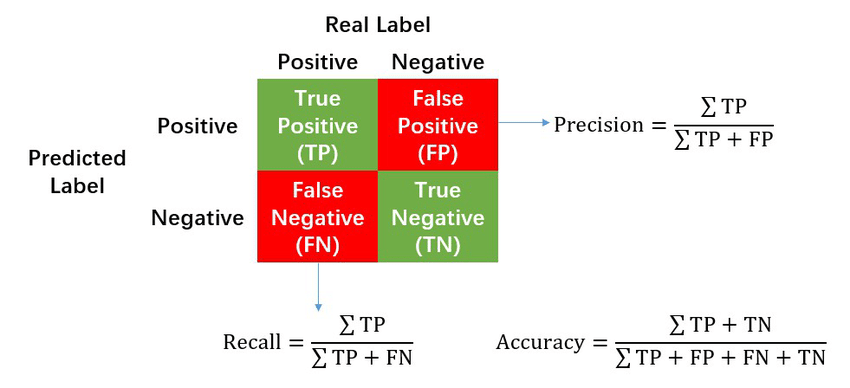

In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                 precision    recall  f1-score   support

  Ammobaculites       0.97      1.00      0.99       100
       Dorothia       0.98      0.97      0.97        99
      Eggerella       0.99      0.97      0.98       100
       Gaudryna       0.99      0.97      0.98       100
        Lituola       0.98      1.00      0.99        93
Quinqueloculina       0.99      0.95      0.97       100
  Spiroloculina       0.96      0.96      0.96       100
    Triloculina       0.98      0.96      0.97       100
       Tritexia       0.91      0.96      0.94        77
Trochamminoides       1.00      1.00      1.00       100
     Vernuilina       0.98      1.00      0.99        82

       accuracy                           0.98      1051
      macro avg       0.98      0.98      0.98      1051
   weighted avg       0.98      0.98      0.98      1051



In [42]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  96,   0,   0,   0,   0,   0,   0,   1,   0,   2],
       [  1,   2,  97,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  97,   0,   0,   1,   2,   0,   0,   0],
       [  0,   0,   0,   0,  93,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   1,  95,   0,   0,   3,   0,   0],
       [  0,   0,   1,   1,   0,   0,  96,   0,   2,   0,   0],
       [  0,   0,   0,   0,   0,   0,   3,  96,   1,   0,   0],
       [  1,   0,   0,   0,   1,   1,   0,   0,  74,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 100,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  82]],
      dtype=int64)

### Confusion Matrix Visualization

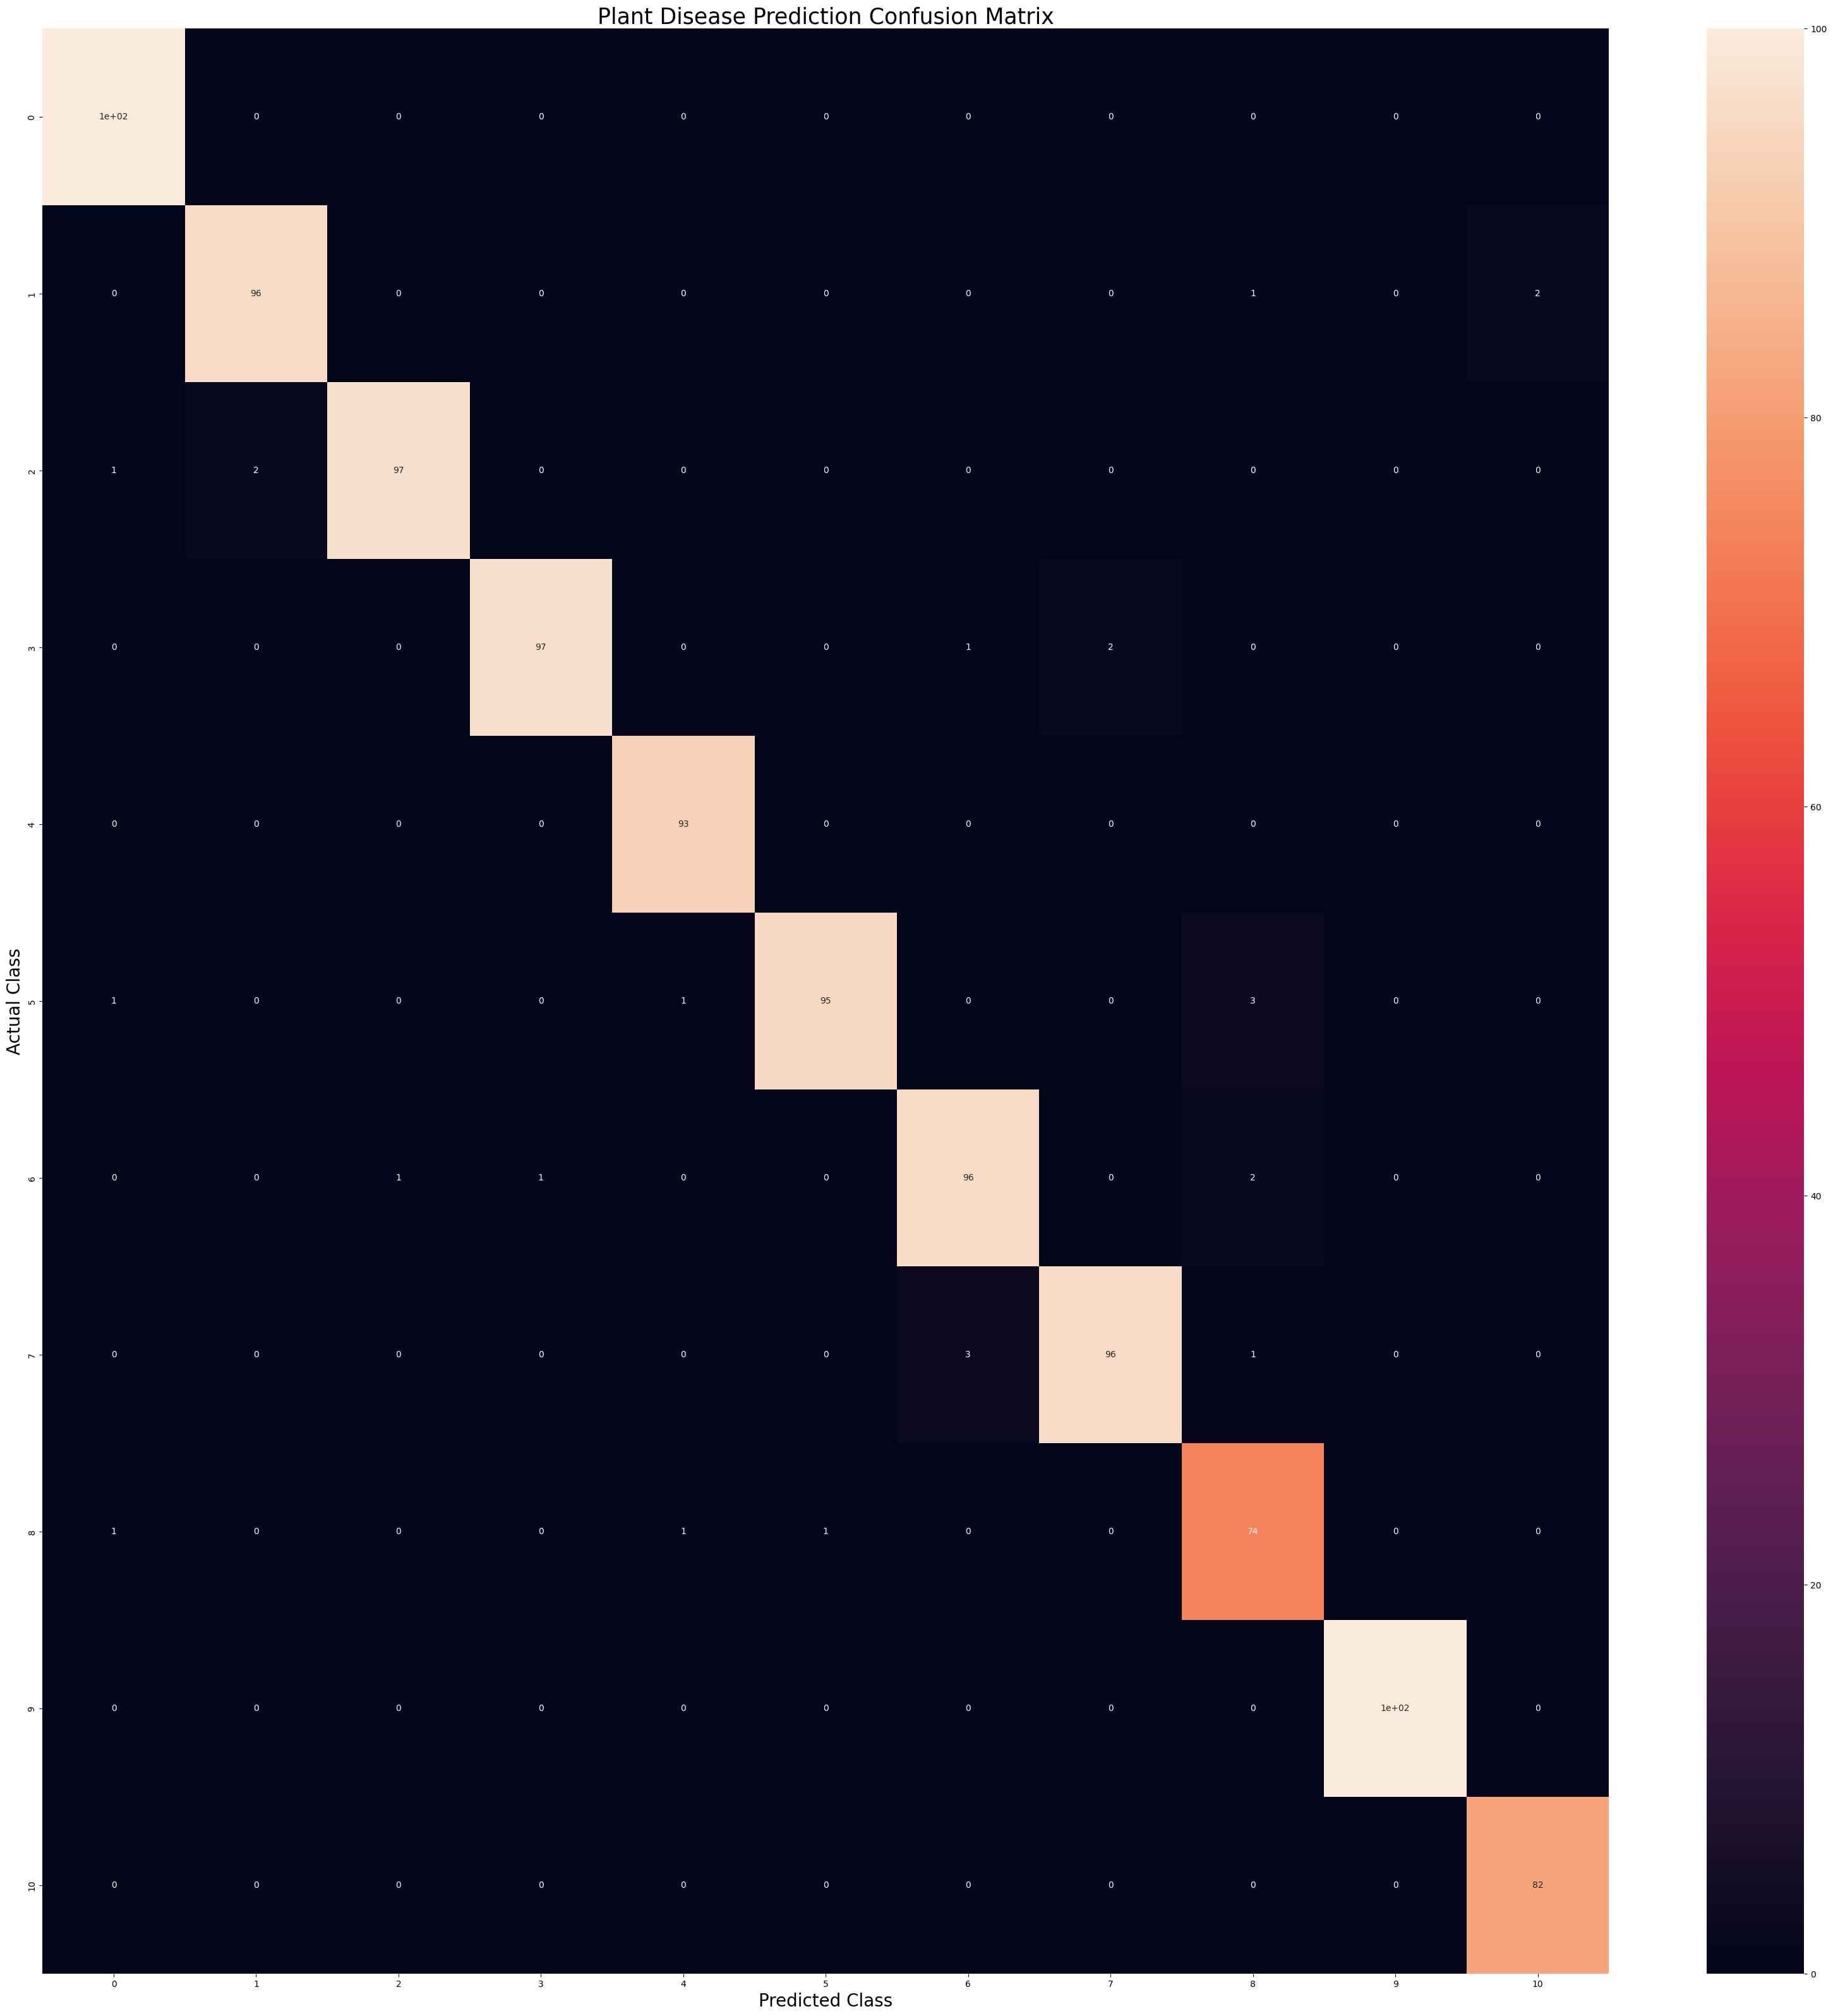

In [43]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()